In [ ]:
! pip uninstall -y kaggle
! pip install -q kaggle==1.5.6
! pip install --upgrade kaggle

Uninstalling kaggle-1.5.6:
  Successfully uninstalled kaggle-1.5.6
     |████████████████████████████████| 61kB 1.9MB/s 
     |████████████████████████████████| 61kB 1.8MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.8-cp36-none-any.whl size=73275 sha256=d86083023796beb861fcd59ae4c4beac7f94b6c3ff468ad319a26552945fd857
  Stored in directory: /root/.cache/pip/wheels/94/a7/09/68dc83c7c14fdbdf5d3f2b2da5b87e587bfc1e85df69b1130c
  Created wheel for slugify: filename=slugify-0.0.1-cp36-none-any.whl size=1910 sha256=0afc69e85a6270c5c6b4967909a8fb0ed26cd47723dcb20827bbecc7e19e3a3f
  Stored in directory: /root/.cache/pip/wheels/f9/68/7b/b797d07992b6c7ef1666a59cc79f45fb37aab4344efa6cc3e1
Successfully built kaggle slugify
  Found existing installation: kaggle 1.5.6
    Uninstalling kaggle-1.5.6:
      Successfully uninstalled kaggle-1.5.6


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"naadaa","key":"497200fd1831c6425fc85b35be266e7a"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c plant-seedlings-classification

100% 1.68G/1.69G [00:45<00:00, 27.5MB/s]
100% 1.69G/1.69G [00:45<00:00, 39.4MB/s]


In [ ]:
! unzip plant-seedlings-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: test/adb7a032c.png      
  inflating: test/ae90f2827.png      
  inflating: test/aecfaed64.png      
  inflating: test/aee6fa3df.png      
  inflating: test/af45e222a.png      
  inflating: test/afa446484.png      
  inflating: test/afcf6abd5.png      
  inflating: test/b026bf8ca.png      
  inflating: test/b03397525.png      
  inflating: test/b0acaff4a.png      
  inflating: test/b130a0632.png      
  inflating: test/b145ba9d4.png      
  inflating: test/b1cd2a91e.png      
  inflating: test/b215531dd.png      
  inflating: test/b2706e2b3.png      
  inflating: test/b29339405.png      
  inflating: test/b30ab4659.png      
  inflating: test/b31292706.png      
  inflating: test/b341d0aab.png      
  inflating: test/b39c71707.png      
  inflating: test/b3d6fdb80.png      
  inflating: test/b3e08b037.png      
  inflating: test/b47691c08.png      
  inflating: test/b4c3df835.png      
  inflating: test/b4f7c9214.png      

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img 
import glob
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory
from PIL import Image
from distutils.dir_util import copy_tree
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
os. getcwd()

'/content'

In [ ]:
os. listdir('/content')   

['.config',
 'sample_submission.csv',
 'test',
 'train',
 'plant-seedlings-classification.zip',
 'kaggle.json',
 'sample_data']

In [ ]:
class_dict={}
class_list=[]
for name in glob.glob('/content/train/*'): 
    class_dict[name[len('/content/train/'):]]=0
    class_list.append(name[len('/content/train/'):])

In [ ]:
print("Total number of classes: ",len(class_list),'\n')
total_examples=0
for i in class_list: 
    class_dict[i]=len(os.listdir('/content/train/'+str(i)))
    total_examples+=len(os.listdir('/content/train/'+str(i)))
    
print('total images: ',total_examples)
class_dict 

Total number of classes:  12 

total images:  4750


{'Black-grass': 263,
 'Charlock': 390,
 'Cleavers': 287,
 'Common Chickweed': 611,
 'Common wheat': 221,
 'Fat Hen': 475,
 'Loose Silky-bent': 654,
 'Maize': 221,
 'Scentless Mayweed': 516,
 'Shepherds Purse': 231,
 'Small-flowered Cranesbill': 496,
 'Sugar beet': 385}

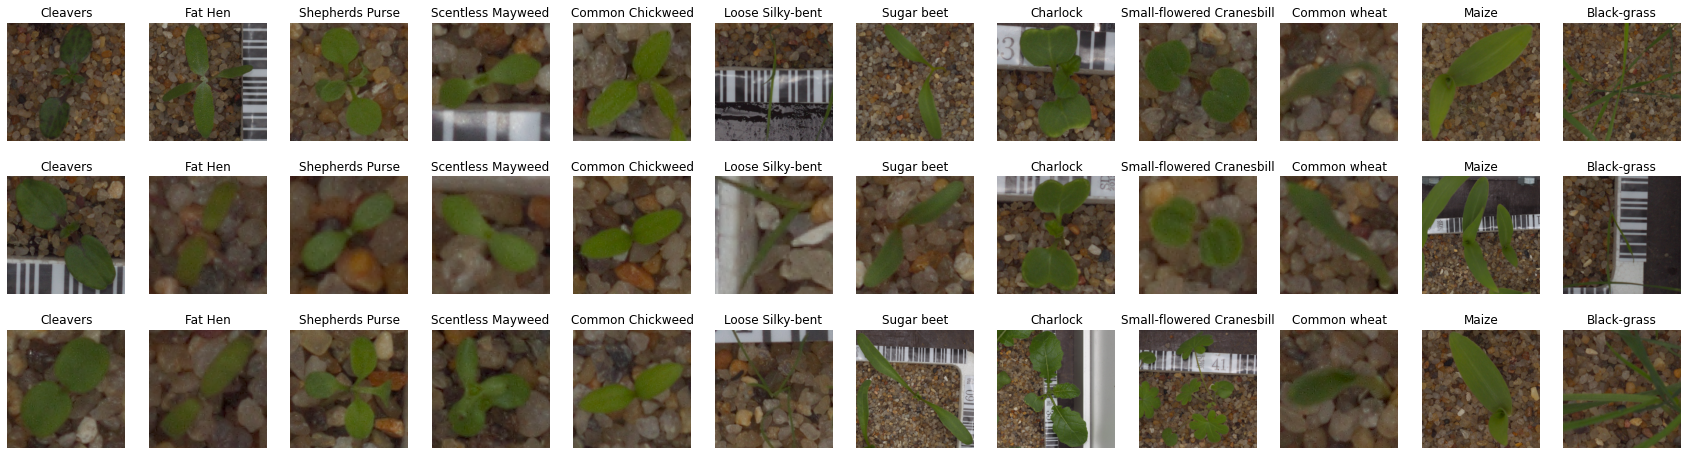

In [ ]:
fig,image =  plt.subplots(3,12,squeeze=False,figsize=(30,8))
for j in range(12):
    ls = os.listdir('/content/train/'+str(class_list[j]))
    for i in range(0,3):
        a=img.imread('/content/train/'+str(class_list[j])+'/'+ls[3*i])
        image[i][j].imshow(a)
        image[i][j].axis("off")
        image[i][j].set_title(class_list[j])

**This is imbalanced data set. we will generate augmented images for each class to have 700 images**


In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(factor=(-0.2, 0.3)),
  tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor=(- 0.5,-0.2))
])

**Data augmentation**

In [ ]:
for i in range(len(class_list)):
    images_to_augment = 700 - class_dict[class_list[i]]
    for k in range(0,images_to_augment):
        ls =  10*os.listdir('/content/train/'+class_list[i])
        a  =  img.imread('/content/train/'+class_list[i]+'/'+ls[k])
        a1 =  np.array(data_augmentation(tf.expand_dims(a, 0))[0])
        plt.imsave(fname ='/content/train/'+class_list[i]+'/'+'augment_'+str(k)+'.png',
                   arr=a1,format='png')   

In [ ]:
total_examples=0
for i in class_list: 
    class_dict[i]=len(os.listdir('/content/train/'+str(i)))
    total_examples+=len(os.listdir('/content/train/'+str(i)))
    
print('total images: ',total_examples)
class_dict 

total images:  8400


{'Black-grass': 700,
 'Charlock': 700,
 'Cleavers': 700,
 'Common Chickweed': 700,
 'Common wheat': 700,
 'Fat Hen': 700,
 'Loose Silky-bent': 700,
 'Maize': 700,
 'Scentless Mayweed': 700,
 'Shepherds Purse': 700,
 'Small-flowered Cranesbill': 700,
 'Sugar beet': 700}

**Deviding data into train and validation set**


In [ ]:
batch_size = 100
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/train',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8400 files belonging to 12 classes.
Using 6720 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/train',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8400 files belonging to 12 classes.
Using 1680 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']


**VGG 16**

In [ ]:
preprocess_input = tf.keras.applications.vgg16.preprocess_input

In [ ]:
IMG_SHAPE = (img_height, img_width) + (3,)
base_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 180, 180, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 180, 180, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 90, 90, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 90, 90, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 90, 90, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 45, 45, 128)       0     

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(12, activation='softmax')

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/VGG16', monitor='val_loss', verbose=1,save_best_only=True, save_weights_only=False, mode='auto', save_frequency=1)


inputs  = tf.keras.Input(shape=(180, 180, 3))
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.1)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.Adam(), metrics=['accuracy'])
history = model.fit(train_ds,
                    epochs=50,
                    validation_data=val_ds,
                    callbacks=[checkpoint])
                   

Epoch 1/50
68/68 [==============================] - ETA: 0s - loss: 3.3232 - accuracy: 0.2199
Epoch 00001: val_loss improved from inf to 1.89953, saving model to /content/VGG16
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/VGG16/assets
68/68 [==============================] - 99s 1s/step - loss: 3.3232 - accuracy: 0.2199 - val_loss: 1.8995 - val_accuracy: 0.4012
Epoch 2/50
67/68 [============================>.] - ETA: 1s - loss: 1.8467 - accuracy: 0.4273
Epoch 00002: val_loss improved from 1.89953 to 1.35527, saving model to /content/VGG16
INFO:tensorflow:Assets written to: /content/VGG16/assets
68/68 [==============================] - 96s 1s/step - loss: 1.8451 - accuracy: 0.4275 - val_loss: 1.3553 - val_accuracy: 0.5446
Epoch 3/50
67/68 [==================

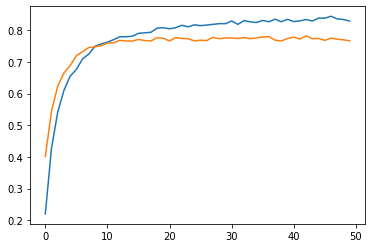

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
model = tf.keras.models.load_model('/content/VGG16')

In [ ]:
pre = []
labels=[]
for _ , label_batch in val_ds.as_numpy_iterator():
  pre = pre + list(np.argmax(model.predict(_), axis=1))
  labels = labels + list(label_batch)


print(confusion_matrix(pre, labels))
print(classification_report(pre, labels))

[[101   0   1   0  11   4  25   1   2   0   1   3]
 [  0  98   3   1   2   5   0   2   1   3   3   1]
 [  0   5 133   3   0   2   0   1   1   1   2   5]
 [  1   0   4 109   0  10   0   0   5   5   6   2]
 [  7   0   1   0 117   5   2   2   0   1   0   4]
 [  2   1   1   4   3 102   0   2   5   1   0  12]
 [ 28   1   0   1   1   2 104   0  12   1   0   0]
 [  0   1   1   0   9   0   0 125   0   0   0   2]
 [  1   2   0   9   3   2   5   1  90  11   1   1]
 [  0   4   6   8   1   5   0   1   7 101  12   2]
 [  1  11   5   6   1   1   0   1   3  12 101   0]
 [  0   2   1   2   3  10   2   4   0   0   0 118]]
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       149
           1       0.78      0.82      0.80       119
           2       0.85      0.87      0.86       153
           3       0.76      0.77      0.76       142
           4       0.77      0.84      0.81       139
           5       0.69      0.77      0.73       133
        

**Inception**

In [ ]:
preprocess_input = tf.keras.applications.inception_v3.preprocess_input

In [ ]:
IMG_SHAPE = (img_height, img_width) + (3,)
base_model = tf.keras.applications.InceptionV3(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')

87916544/87910968 [==============================] - 3s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 180, 180, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 89, 89, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 89, 89, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 89, 89, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(12, activation='softmax')

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/Inception', monitor='val_loss', verbose=1,save_best_only=True, save_weights_only=False, mode='auto', save_frequency=1)


inputs  = tf.keras.Input(shape=(180, 180, 3))
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.1)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.Adam(), metrics=['accuracy'])
history = model.fit(train_ds,
                    epochs=50,
                    validation_data=val_ds,
                    callbacks=[checkpoint])
                    

Epoch 1/50
68/68 [==============================] - ETA: 0s - loss: 1.7491 - accuracy: 0.4287
Epoch 00001: val_loss improved from inf to 1.32457, saving model to /content/Inception
INFO:tensorflow:Assets written to: /content/Inception/assets
68/68 [==============================] - 121s 2s/step - loss: 1.7491 - accuracy: 0.4287 - val_loss: 1.3246 - val_accuracy: 0.5756
Epoch 2/50
67/68 [============================>.] - ETA: 1s - loss: 1.1168 - accuracy: 0.6455
Epoch 00002: val_loss improved from 1.32457 to 1.03378, saving model to /content/Inception
INFO:tensorflow:Assets written to: /content/Inception/assets
68/68 [==============================] - 120s 2s/step - loss: 1.1170 - accuracy: 0.6454 - val_loss: 1.0338 - val_accuracy: 0.6839
Epoch 3/50
67/68 [============================>.] - ETA: 1s - loss: 0.9127 - accuracy: 0.7106
Epoch 00003: val_loss improved from 1.03378 to 0.89942, saving model to /content/Inception
INFO:tensorflow:Assets written to: /content/Inception/assets
68/68 

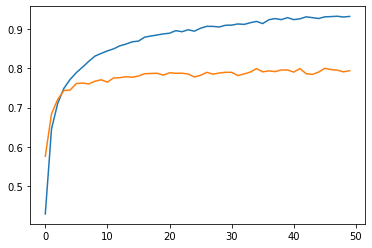

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
model = tf.keras.models.load_model('/content/Inception')

In [ ]:
pre = []
labels=[]
for _ , label_batch in val_ds.as_numpy_iterator():
  pre = pre + list(np.argmax(model.predict(_), axis=1))
  labels = labels + list(label_batch)


print(confusion_matrix(pre, labels))
print(classification_report(pre, labels))

[[ 96   0   0   0   9   3  30   0   4   0   0   1]
 [  0 107   5   1   1   4   0   3   1   1   1   0]
 [  0   4 125   1   1   1   0   0   2   4   1   2]
 [  0   1   2 119   1   4   1   0   5   7   7   1]
 [  5   1   0   0 115   3   2   1   0   0   0   6]
 [  4   5   3   5   7 122   4   0   4   1   0  18]
 [ 36   0   2   1   2   0  95   0   4   3   0   0]
 [  0   0   3   0   7   1   1 132   1   0   0   2]
 [  0   0   1   4   2   1   5   0  95  10   1   1]
 [  0   1   9  10   2   3   0   1  10 102   6   0]
 [  0   5   4   2   0   1   0   0   0   8 110   0]
 [  0   1   2   0   4   5   0   3   0   0   0 119]]
              precision    recall  f1-score   support

           0       0.68      0.67      0.68       143
           1       0.86      0.86      0.86       124
           2       0.80      0.89      0.84       141
           3       0.83      0.80      0.82       148
           4       0.76      0.86      0.81       133
           5       0.82      0.71      0.76       173
        

**Resnet50**

In [ ]:
preprocess_input = tf.keras.applications.resnet50.preprocess_input

In [ ]:
IMG_SHAPE = (img_height, img_width) + (3,)
base_model = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')

In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 180, 180, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 186, 186, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 90, 90, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 90, 90, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(12, activation='softmax')

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/Resnet50', monitor='val_loss', verbose=1,save_best_only=True, save_weights_only=False, mode='auto', save_frequency=1)


inputs  = tf.keras.Input(shape=(180, 180, 3))
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.1)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.Adam(), metrics=['accuracy'])
history = model.fit(train_ds,
                    epochs=50,
                    validation_data=val_ds,
                    callbacks=[checkpoint])


Epoch 1/50
68/68 [==============================] - ETA: 0s - loss: 1.5453 - accuracy: 0.4899
Epoch 00001: val_loss improved from inf to 0.93255, saving model to /content/Resnet50
INFO:tensorflow:Assets written to: /content/Resnet50/assets
68/68 [==============================] - 112s 2s/step - loss: 1.5453 - accuracy: 0.4899 - val_loss: 0.9325 - val_accuracy: 0.7250
Epoch 2/50
67/68 [============================>.] - ETA: 1s - loss: 0.8356 - accuracy: 0.7448
Epoch 00002: val_loss improved from 0.93255 to 0.69846, saving model to /content/Resnet50
INFO:tensorflow:Assets written to: /content/Resnet50/assets
68/68 [==============================] - 111s 2s/step - loss: 0.8345 - accuracy: 0.7451 - val_loss: 0.6985 - val_accuracy: 0.8101
Epoch 3/50
67/68 [============================>.] - ETA: 1s - loss: 0.6517 - accuracy: 0.8051
Epoch 00003: val_loss improved from 0.69846 to 0.58841, saving model to /content/Resnet50
INFO:tensorflow:Assets written to: /content/Resnet50/assets
68/68 [=====

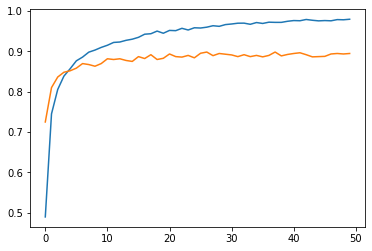

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
model = tf.keras.models.load_model('/content/Resnet50')

In [ ]:
pre = []
labels=[]
for _ , label_batch in val_ds.as_numpy_iterator():
  pre = pre + list(np.argmax(model.predict(_), axis=1))
  labels = labels + list(label_batch)


print(confusion_matrix(pre, labels))
print(classification_report(pre, labels))

[[121   0   0   0   9   1  25   0   2   1   0   0]
 [  0 118   4   0   0   2   0   2   0   0   0   0]
 [  0   3 148   0   0   2   0   0   1   1   1   1]
 [  0   0   0 131   0   3   0   0   4   6   2   0]
 [  5   1   0   0 132   0   1   2   0   1   0   2]
 [  1   1   1   2   3 133   1   0   1   1   0   6]
 [ 14   0   0   0   2   0 109   0   2   0   1   0]
 [  0   0   0   0   2   1   0 134   0   0   0   1]
 [  0   0   1   1   1   1   2   0 108   5   0   1]
 [  0   0   2   5   0   2   0   0   8 120   4   2]
 [  0   2   0   3   0   0   0   0   0   1 118   0]
 [  0   0   0   1   2   3   0   2   0   0   0 137]]
              precision    recall  f1-score   support

           0       0.86      0.76      0.81       159
           1       0.94      0.94      0.94       126
           2       0.95      0.94      0.95       157
           3       0.92      0.90      0.91       146
           4       0.87      0.92      0.89       144
           5       0.90      0.89      0.89       150
        